In [1]:
# libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#load dataset 

In [1]:
df = pd.read_csv('/Users/priyanka/Downloads/Customer_support_data (1).csv')
print(df.head())

NameError: name 'pd' is not defined

In [4]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [6]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [9]:
df['issue_reported_at'] = pd.to_datetime(df['issue_reported_at'], dayfirst=True, errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True, errors='coerce')

df = df.dropna(subset=['issue_reported_at', 'issue_responded'])


In [ ]:
#calculate the Time Difference 

In [10]:
df['response_time_minutes'] = (
    df['issue_responded'] - df['issue_reported_at']
).dt.total_seconds() / 60

df = df[df['response_time_minutes'] >= 0]


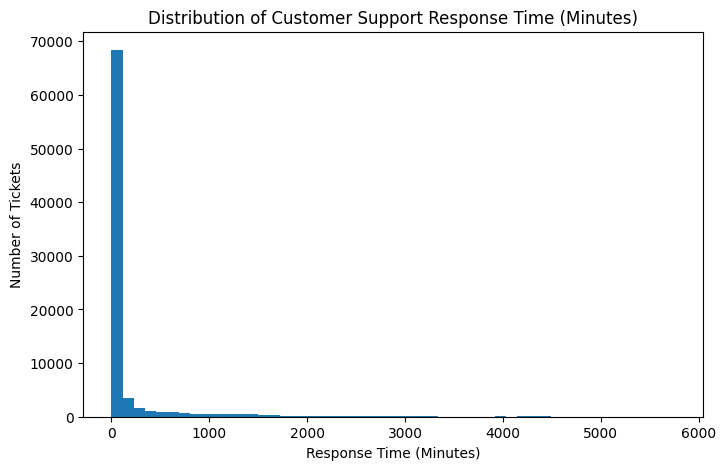

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df['response_time_minutes'], bins=50)
plt.title("Distribution of Customer Support Response Time (Minutes)")
plt.xlabel("Response Time (Minutes)")
plt.ylabel("Number of Tickets")
plt.show()


In [ ]:
# calculate response time by Agent Shift 

<Figure size 900x500 with 0 Axes>

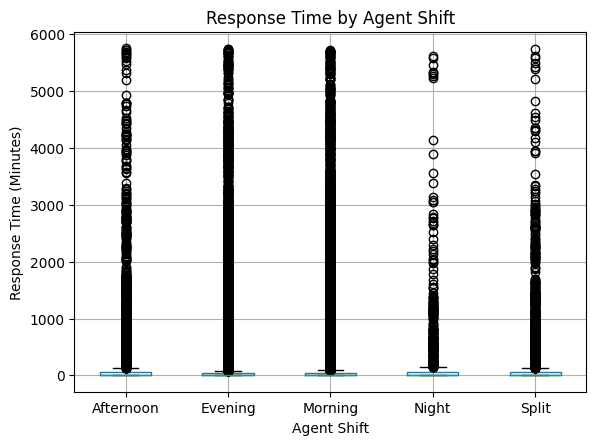

In [12]:
plt.figure(figsize=(9,5))
df.boxplot(column='response_time_minutes', by='agent_shift')

plt.title("Response Time by Agent Shift")
plt.suptitle("")  # remove default pandas title
plt.xlabel("Agent Shift")
plt.ylabel("Response Time (Minutes)")
plt.show()


In [ ]:
# Didtrubution of itmen price 

In [13]:
df['item_price'].describe()


count     16890.000000
mean       5691.189994
std       12890.153365
min           0.000000
25%         393.000000
50%         989.000000
75%        2729.000000
max      164999.000000
Name: item_price, dtype: float64

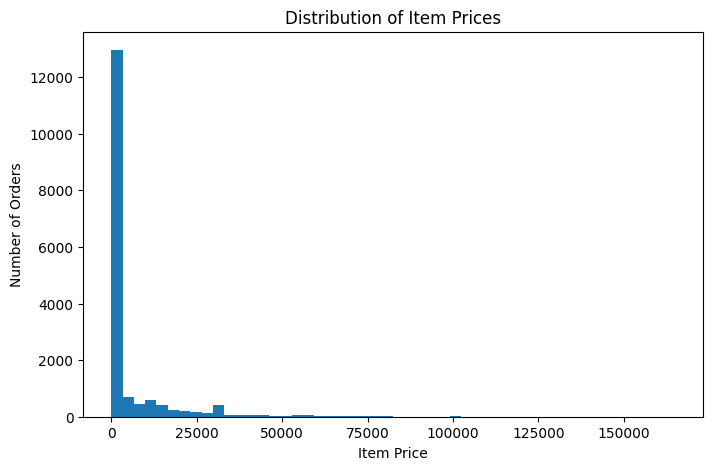

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['item_price'], bins=50)
plt.title("Distribution of Item Prices")
plt.xlabel("Item Price")
plt.ylabel("Number of Orders")
plt.show()


In [ ]:
# Response Time Vs Item Price 

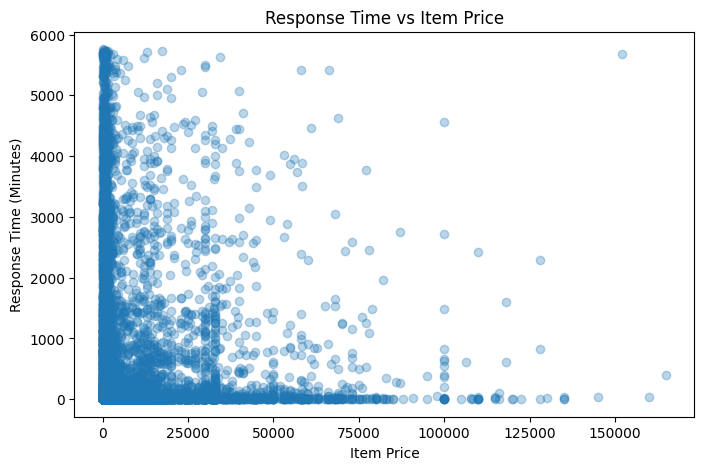

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(
    df['item_price'],
    df['response_time_minutes'],
    alpha=0.3
)

plt.title("Response Time vs Item Price")
plt.xlabel("Item Price")
plt.ylabel("Response Time (Minutes)")
plt.show()


In [ ]:
# number of tickets by Support Channel

In [16]:
channel_counts = df['channel_name'].value_counts()
channel_counts


channel_name
Inbound    65758
Outcall    14125
Email       2896
Name: count, dtype: int64

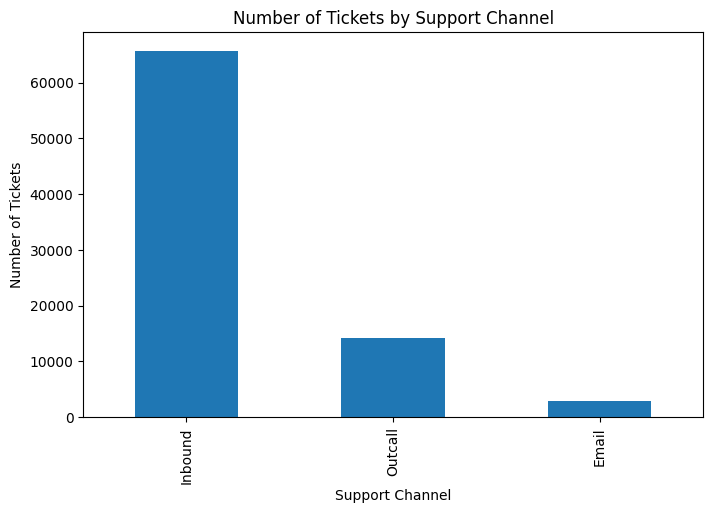

In [17]:
plt.figure(figsize=(8,5))
channel_counts.plot(kind='bar')

plt.title("Number of Tickets by Support Channel")
plt.xlabel("Support Channel")
plt.ylabel("Number of Tickets")
plt.show()


In [ ]:
# Top 10 Cities

In [18]:
top_10_cities = df['customer_city'].value_counts().head(10)
top_10_cities


customer_city
HYDERABAD    709
NEW DELHI    675
PUNE         427
MUMBAI       398
BANGALORE    348
KOLKATA      268
CHENNAI      267
LUCKNOW      252
AHMEDABAD    248
JAIPUR       236
Name: count, dtype: int64

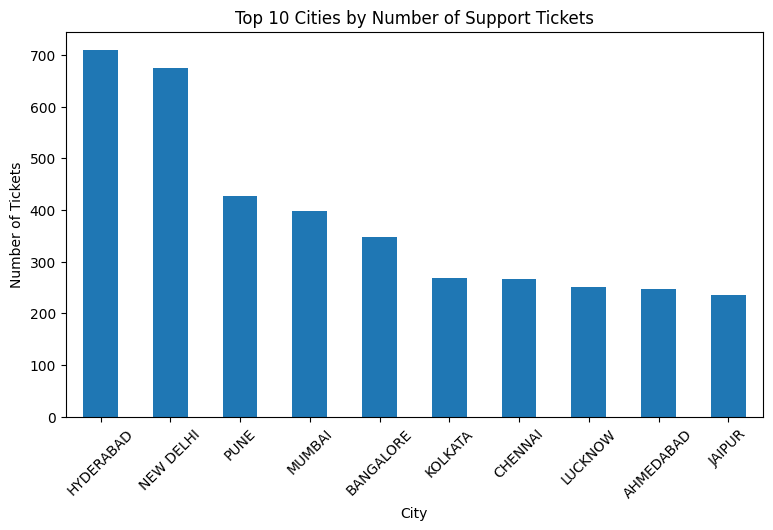

In [19]:
plt.figure(figsize=(9,5))
top_10_cities.plot(kind='bar')

plt.title("Top 10 Cities by Number of Support Tickets")
plt.xlabel("City")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CSAT Score by Agent Shift

In [20]:
shift_csat = df.groupby('agent_shift')['csat_score'].mean().sort_values(ascending=False)
shift_csat


agent_shift
Split        4.429572
Night        4.291925
Afternoon    4.290175
Evening      4.269155
Morning      4.183444
Name: csat_score, dtype: float64

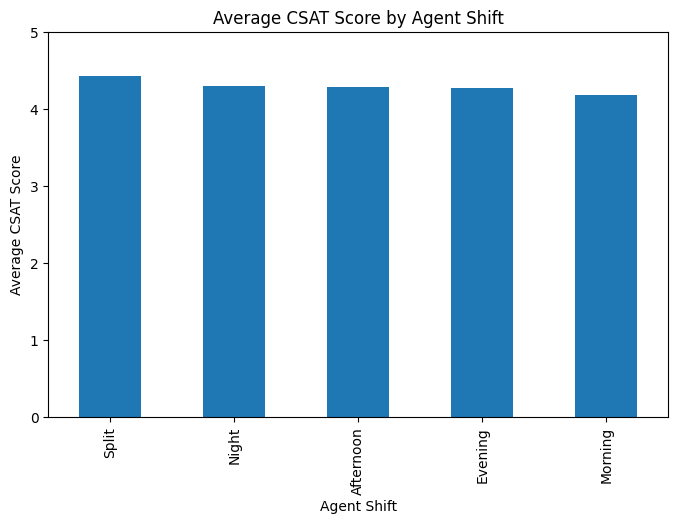

In [21]:
plt.figure(figsize=(8,5))
shift_csat.plot(kind='bar')

plt.title("Average CSAT Score by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Average CSAT Score")
plt.ylim(0,5)
plt.show()


In [ ]:
#CSAT Score by Product Category 

In [22]:
category_csat = (
    df.groupby('product_category')['csat_score']
      .mean()
      .sort_values(ascending=False)
)

category_csat


product_category
Affiliates                     4.190184
LifeStyle                      4.109955
Books & General merchandise    4.028126
Electronics                    4.021014
Home                           3.945089
Home Appliences                3.704510
Mobile                         3.647773
Furniture                      3.613537
GiftCard                       3.230769
Name: csat_score, dtype: float64

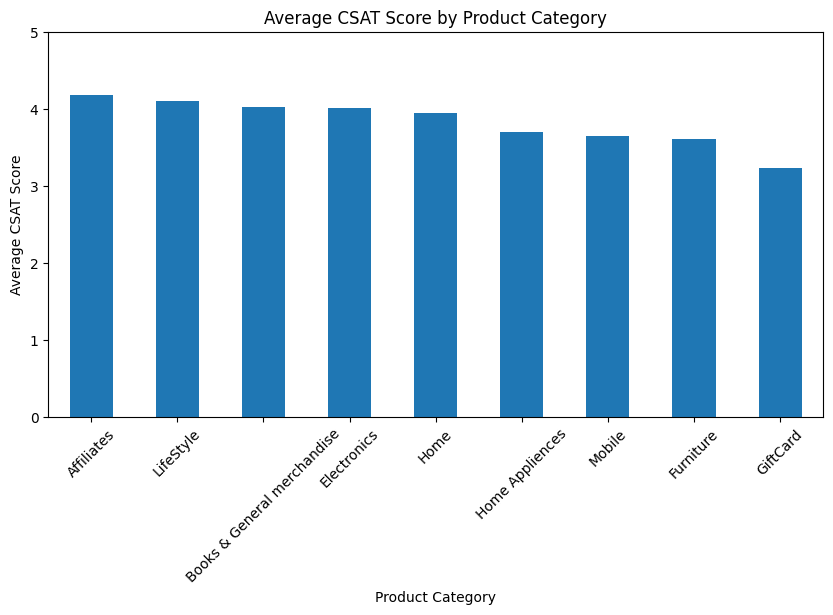

In [23]:
plt.figure(figsize=(10,5))
category_csat.plot(kind='bar')

plt.title("Average CSAT Score by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average CSAT Score")
plt.ylim(0,5)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CSAT Score Distrubution by Support Channel

<Figure size 900x500 with 0 Axes>

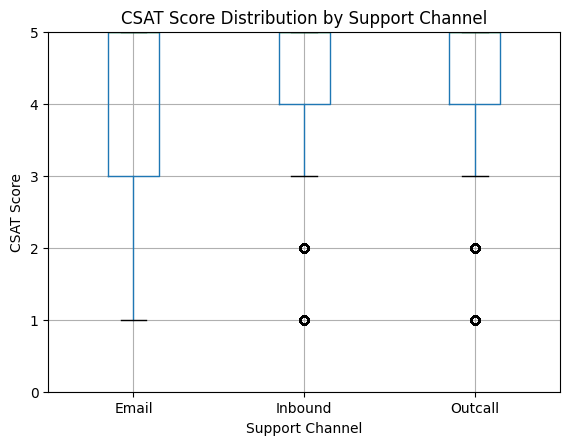

In [24]:
plt.figure(figsize=(9,5))
df.boxplot(column='csat_score', by='channel_name')

plt.title("CSAT Score Distribution by Support Channel")
plt.suptitle("")
plt.xlabel("Support Channel")
plt.ylabel("CSAT Score")
plt.ylim(0,5)
plt.show()


In [ ]:
#Average CSAT Score by Agent Tenure 

In [25]:
tenure_csat = (
    df.groupby('tenure_bucket')['csat_score']
      .mean()
      .sort_values(ascending=False)
)

tenure_csat


tenure_bucket
61-90              4.343166
31-60              4.292025
>90                4.271106
0-30               4.253466
On Job Training    4.131000
Name: csat_score, dtype: float64

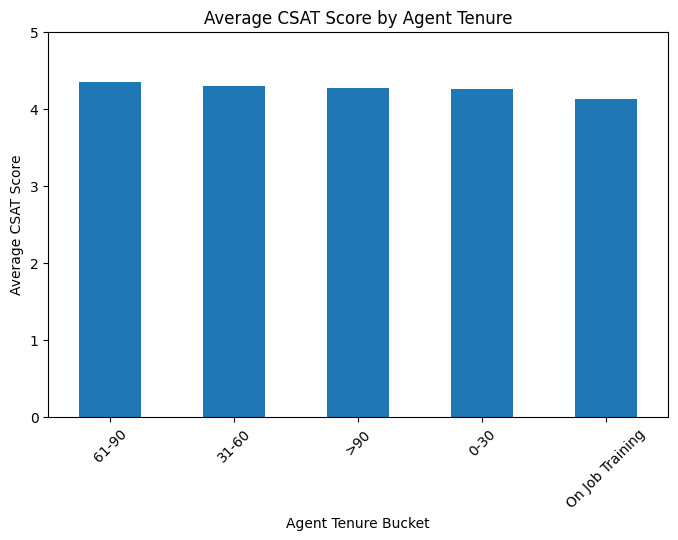

In [26]:
plt.figure(figsize=(8,5))
tenure_csat.plot(kind='bar')

plt.title("Average CSAT Score by Agent Tenure")
plt.xlabel("Agent Tenure Bucket")
plt.ylabel("Average CSAT Score")
plt.ylim(0,5)
plt.xticks(rotation=45)
plt.show()


<Figure size 800x500 with 0 Axes>

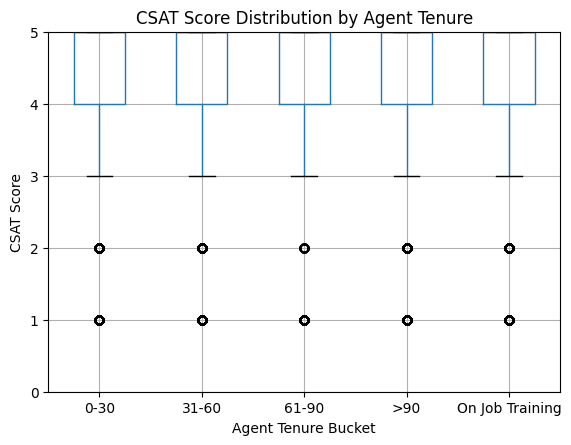

In [27]:
plt.figure(figsize=(8,5))
df.boxplot(column='csat_score', by='tenure_bucket')

plt.title("CSAT Score Distribution by Agent Tenure")
plt.suptitle("")
plt.xlabel("Agent Tenure Bucket")
plt.ylabel("CSAT Score")
plt.ylim(0,5)
plt.show()


In [ ]:
#Top 10 Managers By CSAT Score

In [28]:
manager_csat = (
    df.groupby('manager')['csat_score']
      .mean()
      .sort_values(ascending=False)
)

manager_csat


manager
Emily Chen         4.375254
John Smith         4.266631
Michael Lee        4.256211
Jennifer Nguyen    4.145105
Olivia Tan         4.109867
William Kim        4.105191
Name: csat_score, dtype: float64

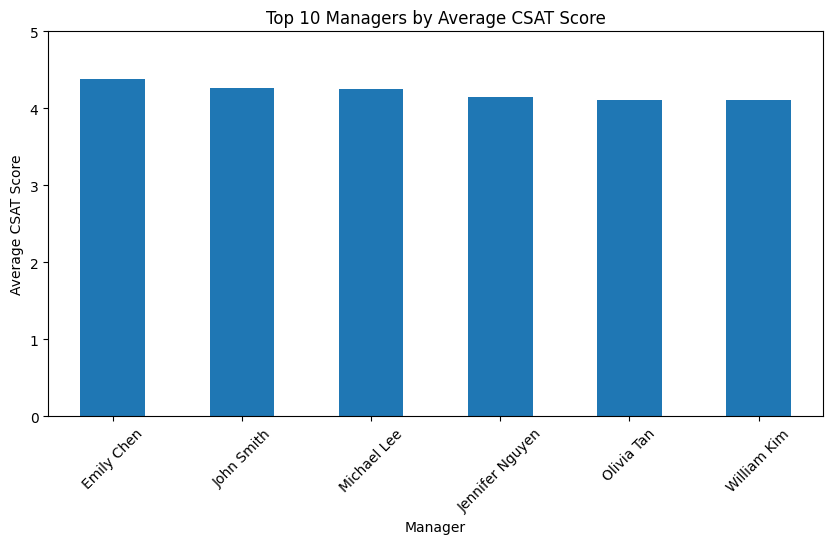

In [29]:
top_10_managers = manager_csat.head(10)

plt.figure(figsize=(10,5))
top_10_managers.plot(kind='bar')

plt.title("Top 10 Managers by Average CSAT Score")
plt.xlabel("Manager")
plt.ylabel("Average CSAT Score")
plt.ylim(0,5)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Managers By CSAT Score

In [32]:
manager_csat = (
    df.groupby('manager')['csat_score']
      .mean()
      .sort_values(ascending=False)
      .reset_index()  
)


In [33]:
manager_csat_pivot = manager_csat.set_index('manager')


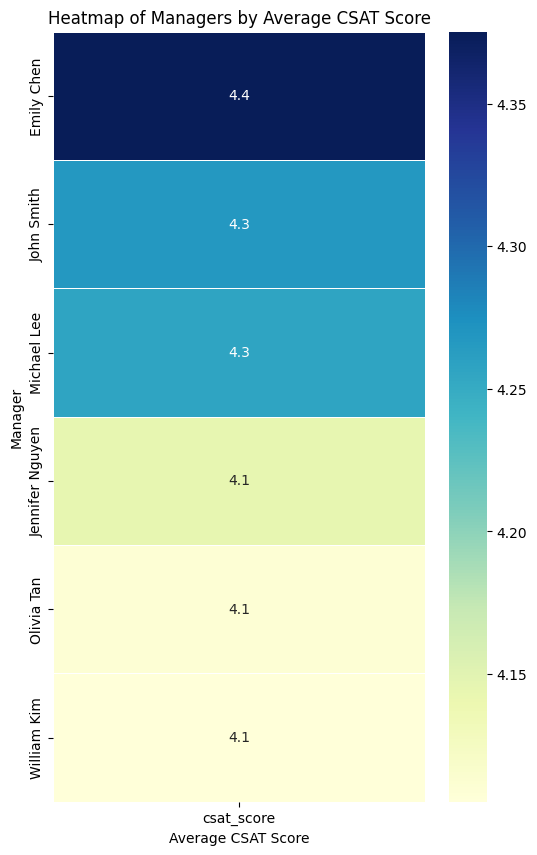

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))

sns.heatmap(
    manager_csat_pivot,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Heatmap of Managers by Average CSAT Score")
plt.xlabel("Average CSAT Score")
plt.ylabel("Manager")
plt.show()


In [36]:
STANDARD_SHIFT_MINUTES = 480


In [37]:
df['overtime_minutes'] = df['connected_handling_time'] - STANDARD_SHIFT_MINUTES

df['overtime_minutes'] = df['overtime_minutes'].apply(
    lambda x: x if x > 0 else 0
)


In [38]:
print(STANDARD_SHIFT_MINUTES)
df[['connected_handling_time','overtime_minutes']].head()


480


,connected_handling_time,overtime_minutes
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0


In [ ]:
#Agent Shift Overtime

In [39]:
agent_shift_overtime = (
    df.groupby(['agent_name', 'agent_shift'])['overtime_minutes']
      .sum()
      .reset_index()
      .sort_values(by='overtime_minutes', ascending=False)
)

agent_shift_overtime.head(10)


,agent_name,agent_shift,overtime_minutes
844,Mary Vasquez,Morning,1571.0
1167,Sean Williams,Morning,1506.0
1002,Nicole Simpson DVM,Morning,1304.0
1164,Sean Gay,Morning,1180.0
233,Christopher Anderson,Afternoon,1066.0
131,Bob Keith,Afternoon,911.0
759,Laura Beck,Afternoon,850.0
240,Christopher Mcintosh,Morning,779.0
681,Kathleen Mcdonald,Morning,686.0
694,Katrina White,Morning,680.0


In [ ]:
# Top 10 Agent Shift By Overtime

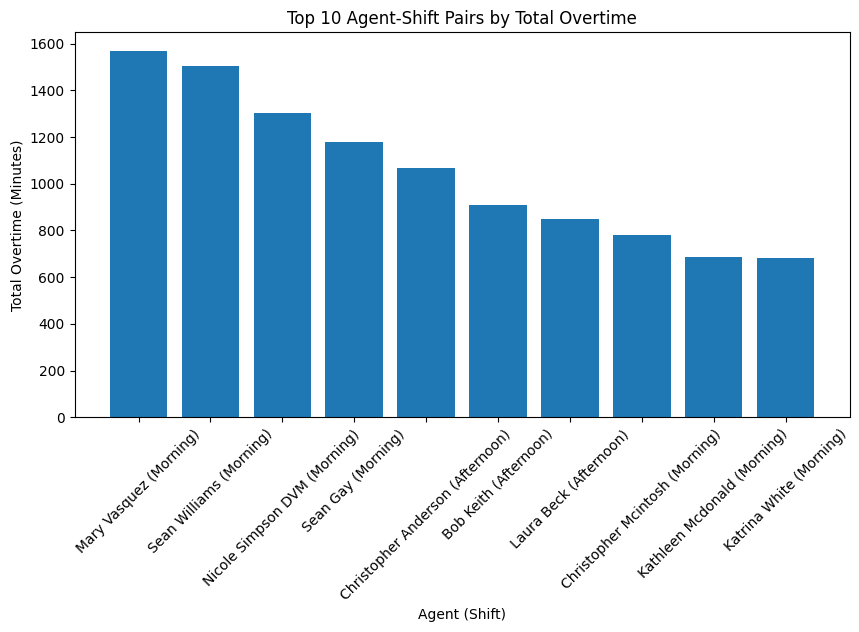

In [40]:
import matplotlib.pyplot as plt

top_10_overtime = agent_shift_overtime.head(10)

plt.figure(figsize=(10,5))
plt.bar(
    top_10_overtime['agent_name'] + " (" + top_10_overtime['agent_shift'] + ")",
    top_10_overtime['overtime_minutes']
)

plt.title("Top 10 Agent-Shift Pairs by Total Overtime")
plt.xlabel("Agent (Shift)")
plt.ylabel("Total Overtime (Minutes)")
plt.xticks(rotation=45)
plt.show()
